In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
import tensorflow as tf

# RNN metadata:

In [2]:
cle = pd.read_csv('cle_metadata_rnn.csv')
vir = pd.read_csv('vir_metadata_rnn.csv')
hun = pd.read_csv('hun_metadata_rnn.csv')
swi = pd.read_csv('swi_metadata_rnn.csv')

In [3]:
cle_train,cle_test = train_test_split(cle,test_size=0.33, random_state=42)
vir_train,vir_test = train_test_split(vir,test_size=0.33, random_state=42)
hun_train,hun_test = train_test_split(hun,test_size=0.33, random_state=42)
swi_train,swi_test = train_test_split(swi,test_size=0.33, random_state=42)

In [4]:
cle_train.to_csv('cle_metadata_rnn_train.csv',index = False)
cle_test.to_csv('cle_metadata_rnn_test.csv',index = False)

In [5]:
vir_train.to_csv('vir_metadata_rnn_train.csv',index = False)
vir_test.to_csv('vir_metadata_rnn_test.csv',index = False)

In [6]:
hun_train.to_csv('hun_metadata_rnn_train.csv',index = False)
hun_test.to_csv('hun_metadata_rnn_test.csv',index = False)

In [7]:
swi_train.to_csv('swi_metadata_rnn_train.csv',index = False)
swi_test.to_csv('swi_metadata_rnn_test.csv',index = False)

In [8]:
Train = pd.concat([cle_train,vir_train,hun_train,swi_train])
Test = pd.concat([cle_test,vir_test,hun_test,swi_test])

In [9]:
X_train = Train.iloc[:,:-1]
X_test = Test.iloc[:,:-1]

y_train = Train.iloc[:,-1]
y_test = Test.iloc[:,-1]

Y_train_binary = y_train.apply(lambda x: 1 if x > 0 else 0)
Y_test_binary = y_test.apply(lambda x: 1 if x > 0 else 0)

# CNN

In [11]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(Conv1D(filters=256, kernel_size=3, activation='relu', input_shape=(64,1)))
model.add(Conv1D(filters=256, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Conv1D(filters=512, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 13s 145ms/step - loss: 0.6931 - accuracy: 0.5577
Epoch 2/1000
20/20 [==============================] - 4s 191ms/step - loss: 0.6203 - accuracy: 0.6748
Epoch 3/1000
20/20 [==============================] - 3s 166ms/step - loss: 0.4910 - accuracy: 0.7854
Epoch 4/1000
20/20 [==============================] - 4s 190ms/step - loss: 0.4352 - accuracy: 0.7984
Epoch 5/1000
20/20 [==============================] - 4s 195ms/step - loss: 0.3998 - accuracy: 0.8276
Epoch 6/1000
20/20 [==============================] - 4s 213ms/step - loss: 0.4005 - accuracy: 0.8211
Epoch 7/1000
20/20 [==============================] - 3s 152ms/step - loss: 0.3674 - accuracy: 0.8407
Epoch 8/1000
20/20 [==============================] - 3s 158ms/step - loss: 0.3559 - accuracy: 0.8455
Epoch 9/1000
20/20 [==============================] - 4s 224ms/step - loss: 0.3300 - accuracy: 0.8650
Epoch 10/1000
20/20 [==============================] - 3s 168ms/step - loss: 0.32

In [12]:
model.save('../Models/Meta_Only/RNNMeta_CNN.h5')

# Test on Each Data Set

In [13]:
def Test(path_train,path_test,model_name):
    Train = pd.read_csv(path_train)
    Test = pd.read_csv(path_test)

    X_train = Train.iloc[:,:-1]
    Y_train = Train.iloc[:,-1]

    X_test = Test.iloc[:,:-1]
    Y_test = Test.iloc[:,-1]

    #binarize the target
    Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
    Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

    model = tf.keras.models.load_model(model_name)

    Y_pred = model.predict(X_test).argmax(axis=1)

    cm = confusion_matrix(Y_pred, Y_test_binary)
    print(cm)
    print(classification_report(Y_test_binary, Y_pred, digits=4))
    
    mismatch = [i for i, (a,b) in enumerate(zip(Y_pred, Y_test_binary)) if a != b]
    print(mismatch)

# Cleveland

In [14]:
path_train = 'cle_metadata_rnn_train.csv'
path_test = 'cle_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_CNN.h5'
Test(path_train,path_test,model)

[[31  1]
 [21 47]]
              precision    recall  f1-score   support

           0     0.9688    0.5962    0.7381        52
           1     0.6912    0.9792    0.8103        48

    accuracy                         0.7800       100
   macro avg     0.8300    0.7877    0.7742       100
weighted avg     0.8355    0.7800    0.7728       100

[9, 14, 16, 19, 20, 22, 27, 28, 42, 46, 48, 50, 53, 59, 67, 72, 73, 81, 84, 85, 86, 96]


# Virginia

In [15]:
path_train = 'vir_metadata_rnn_train.csv'
path_test = 'vir_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_CNN.h5'
Test(path_train,path_test,model)

[[ 9 10]
 [ 6 41]]
              precision    recall  f1-score   support

           0     0.4737    0.6000    0.5294        15
           1     0.8723    0.8039    0.8367        51

    accuracy                         0.7576        66
   macro avg     0.6730    0.7020    0.6831        66
weighted avg     0.7817    0.7576    0.7669        66

[2, 5, 8, 10, 19, 20, 22, 25, 34, 41, 42, 48, 52, 55, 57, 62]


# Hungarian

In [16]:
path_train = 'hun_metadata_rnn_train.csv'
path_test = 'hun_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_CNN.h5'
Test(path_train,path_test,model)

[[56  9]
 [ 4 29]]
              precision    recall  f1-score   support

           0     0.8615    0.9333    0.8960        60
           1     0.8788    0.7632    0.8169        38

    accuracy                         0.8673        98
   macro avg     0.8702    0.8482    0.8565        98
weighted avg     0.8682    0.8673    0.8653        98

[12, 22, 33, 46, 56, 61, 64, 68, 70, 71, 87, 95, 96]


# Switzerland

In [17]:
path_train = 'swi_metadata_rnn_train.csv'
path_test = 'swi_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_CNN.h5'
Test(path_train,path_test,model)

[[ 1  1]
 [ 2 37]]
              precision    recall  f1-score   support

           0     0.5000    0.3333    0.4000         3
           1     0.9487    0.9737    0.9610        38

    accuracy                         0.9268        41
   macro avg     0.7244    0.6535    0.6805        41
weighted avg     0.9159    0.9268    0.9200        41

[12, 15, 21]


# DNN

In [18]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(Dense(64, input_shape=(64,), activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 1s 4ms/step - loss: 0.6765 - accuracy: 0.5740
Epoch 2/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.5892 - accuracy: 0.7154
Epoch 3/1000
20/20 [==============================] - 0s 3ms/step - loss: 0.5398 - accuracy: 0.7203
Epoch 4/1000
20/20 [==============================] - 0s 5ms/step - loss: 0.4834 - accuracy: 0.7886
Epoch 5/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4415 - accuracy: 0.8033
Epoch 6/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4326 - accuracy: 0.7951
Epoch 7/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4389 - accuracy: 0.8016
Epoch 8/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4844 - accuracy: 0.7805
Epoch 9/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4321 - accuracy: 0.8016
Epoch 10/1000
20/20 [==============================] - 0s 4ms/step - loss: 0.4215 - accuracy: 0.8163

In [19]:
model.save('../Models/Meta_Only/RNNMeta_DNN.h5')

In [20]:
print("Cle test")
path_train = 'cle_metadata_rnn_train.csv'
path_test = 'cle_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_rnn_train.csv'
path_test = 'vir_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_rnn_train.csv'
path_test = 'hun_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_DNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_rnn_train.csv'
path_test = 'swi_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_DNN.h5'
Test(path_train,path_test,model)

Cle test
[[41  9]
 [11 39]]
              precision    recall  f1-score   support

           0     0.8200    0.7885    0.8039        52
           1     0.7800    0.8125    0.7959        48

    accuracy                         0.8000       100
   macro avg     0.8000    0.8005    0.7999       100
weighted avg     0.8008    0.8000    0.8001       100

[0, 18, 19, 20, 22, 24, 27, 28, 32, 46, 53, 63, 72, 75, 77, 81, 85, 86, 91, 96]
vir test
[[ 8  7]
 [ 7 44]]
              precision    recall  f1-score   support

           0     0.5333    0.5333    0.5333        15
           1     0.8627    0.8627    0.8627        51

    accuracy                         0.7879        66
   macro avg     0.6980    0.6980    0.6980        66
weighted avg     0.7879    0.7879    0.7879        66

[4, 7, 8, 10, 19, 20, 23, 26, 34, 36, 42, 55, 57, 64]
hun test
[[59 11]
 [ 1 27]]
              precision    recall  f1-score   support

           0     0.8429    0.9833    0.9077        60
           1     0.

# RNN

In [21]:
from keras.layers import Dense, SimpleRNN

In [22]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5)

# define the model architecture
model = Sequential()
model.add(SimpleRNN(units=64, return_sequences=True, input_shape=(64, 1)))
model.add(SimpleRNN(units=32, return_sequences=True))
model.add(SimpleRNN(units=16))
model.add(Dense(units=2, activation='sigmoid'))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
model.fit(X_train, Y_train_binary, epochs=1000, batch_size=32,callbacks=[callback])
Y_pred = model.predict(X_test).argmax(axis=1)
    
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred, digits=4))

Epoch 1/1000
20/20 [==============================] - 8s 65ms/step - loss: 0.6978 - accuracy: 0.5301
Epoch 2/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.6663 - accuracy: 0.6065
Epoch 3/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.6039 - accuracy: 0.6602
Epoch 4/1000
20/20 [==============================] - 1s 65ms/step - loss: 0.5388 - accuracy: 0.7610
Epoch 5/1000
20/20 [==============================] - 1s 65ms/step - loss: 0.5160 - accuracy: 0.7675
Epoch 6/1000
20/20 [==============================] - 1s 63ms/step - loss: 0.4987 - accuracy: 0.7707
Epoch 7/1000
20/20 [==============================] - 1s 64ms/step - loss: 0.4818 - accuracy: 0.7870
Epoch 8/1000
20/20 [==============================] - 1s 66ms/step - loss: 0.4731 - accuracy: 0.7902
Epoch 9/1000
20/20 [==============================] - 1s 66ms/step - loss: 0.4613 - accuracy: 0.7805
Epoch 10/1000
20/20 [==============================] - 1s 66ms/step - loss: 0.4295 - accura

In [23]:
model.save('../Models/Meta_Only/RNNMeta_RNN.h5')

In [24]:
print("Cle test")
path_train = 'cle_metadata_rnn_train.csv'
path_test = 'cle_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_rnn_train.csv'
path_test = 'vir_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_rnn_train.csv'
path_test = 'hun_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_RNN.h5'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_rnn_train.csv'
path_test = 'swi_metadata_rnn_test.csv'
model = '../Models/Meta_Only/RNNMeta_RNN.h5'
Test(path_train,path_test,model)

Cle test
[[32  7]
 [20 41]]
              precision    recall  f1-score   support

           0     0.8205    0.6154    0.7033        52
           1     0.6721    0.8542    0.7523        48

    accuracy                         0.7300       100
   macro avg     0.7463    0.7348    0.7278       100
weighted avg     0.7493    0.7300    0.7268       100

[0, 8, 9, 14, 19, 20, 22, 24, 25, 27, 28, 32, 42, 46, 48, 50, 53, 54, 67, 72, 75, 81, 85, 86, 89, 94, 96]
vir test
[[ 2  1]
 [13 50]]
              precision    recall  f1-score   support

           0     0.6667    0.1333    0.2222        15
           1     0.7937    0.9804    0.8772        51

    accuracy                         0.7879        66
   macro avg     0.7302    0.5569    0.5497        66
weighted avg     0.7648    0.7879    0.7283        66

[6, 7, 8, 10, 18, 19, 20, 23, 26, 35, 41, 48, 53, 58]
hun test
[[58 19]
 [ 2 19]]
              precision    recall  f1-score   support

           0     0.7532    0.9667    0.8467    

c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Machine Learning

# Decision Tree

In [25]:
from sklearn import tree
import matplotlib.pyplot as plt

Confusion Matrix is:
[[101  29]
 [ 29 146]]
Accuracy is : 0.8098360655737705
Report
              precision    recall  f1-score   support

           0       0.78      0.78      0.78       130
           1       0.83      0.83      0.83       175

    accuracy                           0.81       305
   macro avg       0.81      0.81      0.81       305
weighted avg       0.81      0.81      0.81       305



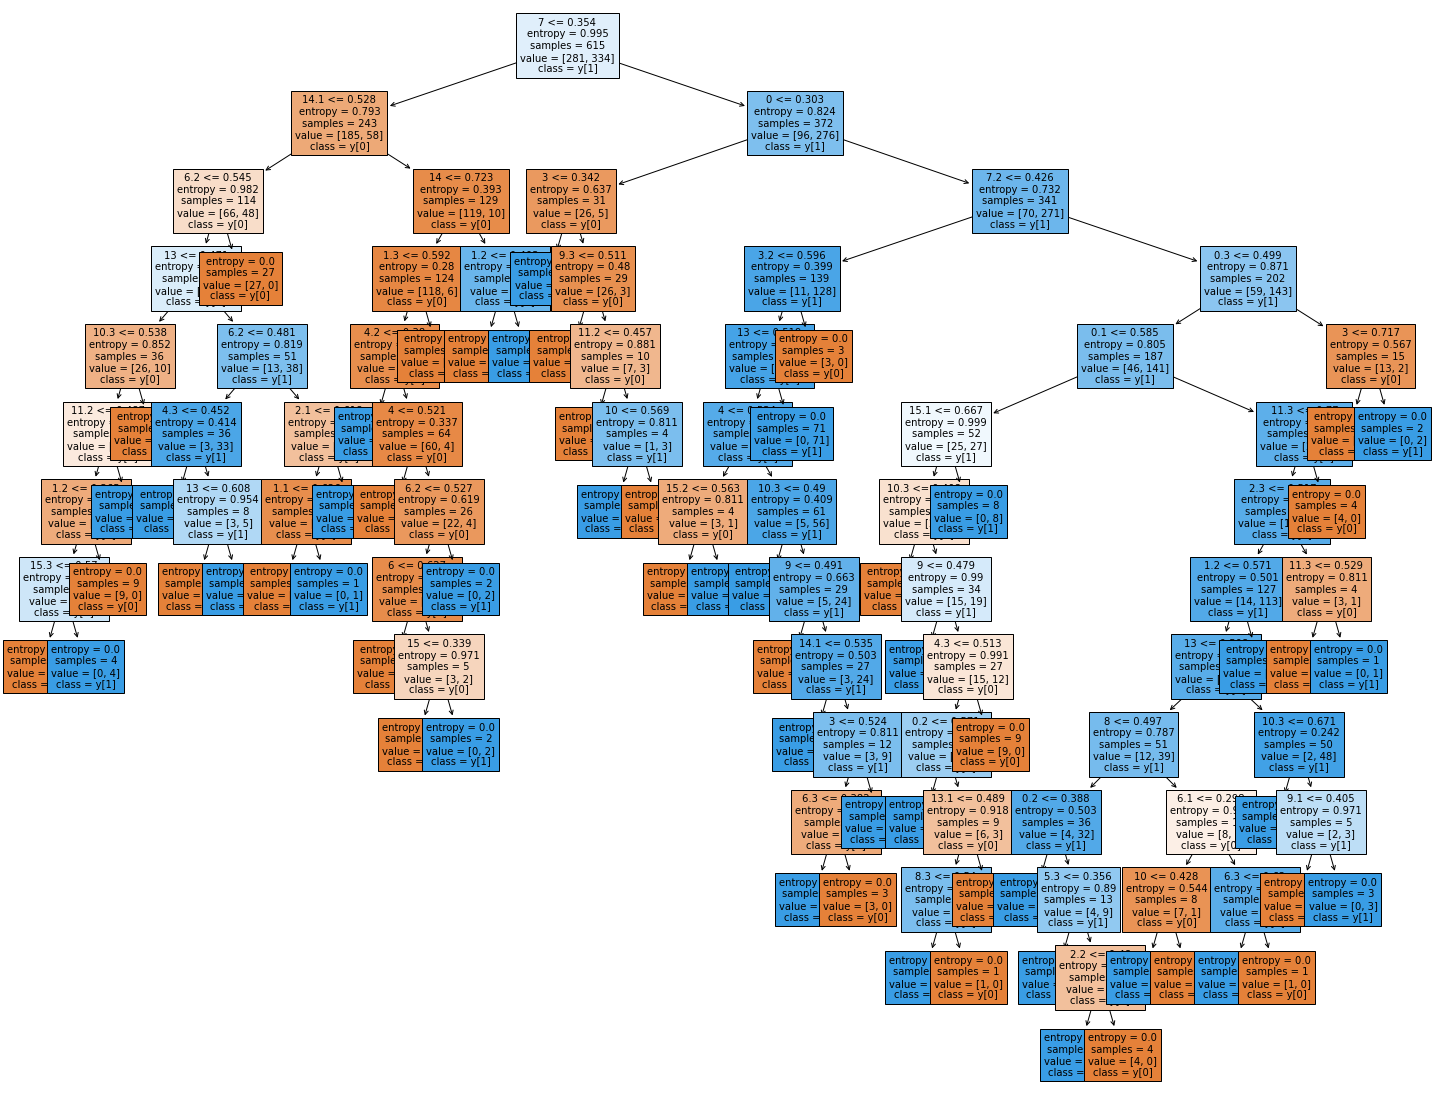

In [26]:
clf = tree.DecisionTreeClassifier(criterion='entropy')
clf.fit(X_train, Y_train_binary)
Y_predictions = clf.predict(X_test)
cm = confusion_matrix(Y_predictions, Y_test_binary)
print("Confusion Matrix is:")
print(cm)
def accuracy(confusion_matrix):
    diagonal_sum = confusion_matrix.trace()
    sum_of_all_elements = confusion_matrix.sum()
    return diagonal_sum / sum_of_all_elements
print("Accuracy is : " + str(accuracy(cm)))

print("Report")
print(classification_report(Y_test_binary, Y_predictions))

#Visualization of the tree
plt.figure(figsize=(25,20))
tree.plot_tree(clf, filled=True, fontsize=10, max_depth= None,feature_names = list(X_train.columns), class_names = True)
plt.show()

In [27]:
from joblib import dump, load
dump(clf, '../Models/Meta_only/RNNMeta_clf.joblib')

['../Models/Meta_only/RNNMeta_clf.joblib']

In [28]:
def Test(path_train,path_test,model_name):
    Train = pd.read_csv(path_train)
    Test = pd.read_csv(path_test)

    X_train = Train.iloc[:,:-1]
    Y_train = Train.iloc[:,-1]

    X_test = Test.iloc[:,:-1]
    Y_test = Test.iloc[:,-1]

    #binarize the target
    Y_train_binary = Y_train.apply(lambda x: 1 if x > 0 else 0)
    Y_test_binary = Y_test.apply(lambda x: 1 if x > 0 else 0)

    model = load(model_name)

    Y_pred = model.predict(X_test)

    cm = confusion_matrix(Y_pred, Y_test_binary)
    print(cm)
    print(classification_report(Y_test_binary, Y_pred, digits=4))
    
    mismatch = [i for i, (a,b) in enumerate(zip(Y_pred, Y_test_binary)) if a != b]
    print(mismatch)

In [29]:
print("Cle test")
path_train = 'cle_metadata_rnn_train.csv'
path_test = 'cle_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_clf.joblib'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_rnn_train.csv'
path_test = 'vir_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_clf.joblib'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_rnn_train.csv'
path_test = 'hun_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_clf.joblib'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_rnn_train.csv'
path_test = 'swi_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_clf.joblib'
Test(path_train,path_test,model)

Cle test
[[38  5]
 [14 43]]
              precision    recall  f1-score   support

           0     0.8837    0.7308    0.8000        52
           1     0.7544    0.8958    0.8190        48

    accuracy                         0.8100       100
   macro avg     0.8191    0.8133    0.8095       100
weighted avg     0.8216    0.8100    0.8091       100

[0, 9, 14, 16, 19, 20, 22, 28, 46, 50, 53, 63, 64, 69, 72, 77, 85, 86, 96]
vir test
[[11 13]
 [ 4 38]]
              precision    recall  f1-score   support

           0     0.4583    0.7333    0.5641        15
           1     0.9048    0.7451    0.8172        51

    accuracy                         0.7424        66
   macro avg     0.6815    0.7392    0.6907        66
weighted avg     0.8033    0.7424    0.7597        66

[0, 4, 7, 10, 19, 25, 26, 30, 32, 34, 36, 42, 46, 50, 55, 57, 60]
hun test
[[51  7]
 [ 9 31]]
              precision    recall  f1-score   support

           0     0.8793    0.8500    0.8644        60
           1

# Bayesian Classifier

In [30]:
from sklearn.naive_bayes import GaussianNB

classifier = GaussianNB()
classifier.fit(X_train, Y_train_binary)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred))

[[ 97  45]
 [ 33 130]]
              precision    recall  f1-score   support

           0       0.68      0.75      0.71       130
           1       0.80      0.74      0.77       175

    accuracy                           0.74       305
   macro avg       0.74      0.74      0.74       305
weighted avg       0.75      0.74      0.75       305



In [31]:
dump(clf, '../Models/Meta_only/RNNMeta_NB.joblib')

['../Models/Meta_only/RNNMeta_NB.joblib']

In [32]:
print("Cle test")
path_train = 'cle_metadata_rnn_train.csv'
path_test = 'cle_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_NB.joblib'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_rnn_train.csv'
path_test = 'vir_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_NB.joblib'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_rnn_train.csv'
path_test = 'hun_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_NB.joblib'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_rnn_train.csv'
path_test = 'swi_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_NB.joblib'
Test(path_train,path_test,model)

Cle test
[[38  5]
 [14 43]]
              precision    recall  f1-score   support

           0     0.8837    0.7308    0.8000        52
           1     0.7544    0.8958    0.8190        48

    accuracy                         0.8100       100
   macro avg     0.8191    0.8133    0.8095       100
weighted avg     0.8216    0.8100    0.8091       100

[0, 9, 14, 16, 19, 20, 22, 28, 46, 50, 53, 63, 64, 69, 72, 77, 85, 86, 96]
vir test
[[11 13]
 [ 4 38]]
              precision    recall  f1-score   support

           0     0.4583    0.7333    0.5641        15
           1     0.9048    0.7451    0.8172        51

    accuracy                         0.7424        66
   macro avg     0.6815    0.7392    0.6907        66
weighted avg     0.8033    0.7424    0.7597        66

[0, 4, 7, 10, 19, 25, 26, 30, 32, 34, 36, 42, 46, 50, 55, 57, 60]
hun test
[[51  7]
 [ 9 31]]
              precision    recall  f1-score   support

           0     0.8793    0.8500    0.8644        60
           1

# Random Forest

In [33]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=42)
classifier.fit(X_train, Y_train_binary)
Y_pred = classifier.predict(X_test)
cm = confusion_matrix(Y_pred, Y_test_binary)
print(cm)
print(classification_report(Y_test_binary, Y_pred))

[[ 97  16]
 [ 33 159]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       130
           1       0.83      0.91      0.87       175

    accuracy                           0.84       305
   macro avg       0.84      0.83      0.83       305
weighted avg       0.84      0.84      0.84       305



In [34]:
dump(classifier, '../Models/Meta_only/RNNMeta_RF.joblib')

['../Models/Meta_only/RNNMeta_RF.joblib']

In [35]:
print("Cle test")
path_train = 'cle_metadata_rnn_train.csv'
path_test = 'cle_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_RF.joblib'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_rnn_train.csv'
path_test = 'vir_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_RF.joblib'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_rnn_train.csv'
path_test = 'hun_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_RF.joblib'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_rnn_train.csv'
path_test = 'swi_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_RF.joblib'
Test(path_train,path_test,model)

Cle test
[[38  2]
 [14 46]]
              precision    recall  f1-score   support

           0     0.9500    0.7308    0.8261        52
           1     0.7667    0.9583    0.8519        48

    accuracy                         0.8400       100
   macro avg     0.8583    0.8446    0.8390       100
weighted avg     0.8620    0.8400    0.8385       100

[8, 9, 14, 19, 20, 27, 28, 46, 53, 67, 72, 77, 81, 85, 86, 96]
vir test
[[ 3  4]
 [12 47]]
              precision    recall  f1-score   support

           0     0.4286    0.2000    0.2727        15
           1     0.7966    0.9216    0.8545        51

    accuracy                         0.7576        66
   macro avg     0.6126    0.5608    0.5636        66
weighted avg     0.7130    0.7576    0.7223        66

[7, 8, 10, 16, 19, 20, 23, 26, 28, 35, 41, 42, 46, 48, 56, 62]
hun test
[[56 10]
 [ 4 28]]
              precision    recall  f1-score   support

           0     0.8485    0.9333    0.8889        60
           1     0.8750    

c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# SVM

In [36]:
from sklearn.svm import SVC

svc = SVC()
svc.fit(X_train, Y_train_binary.values.ravel())
y_pred = svc.predict(X_test)
print(confusion_matrix(Y_test_binary, y_pred))
print(classification_report(Y_test_binary, y_pred))

[[ 97  33]
 [ 16 159]]
              precision    recall  f1-score   support

           0       0.86      0.75      0.80       130
           1       0.83      0.91      0.87       175

    accuracy                           0.84       305
   macro avg       0.84      0.83      0.83       305
weighted avg       0.84      0.84      0.84       305



In [37]:
dump(svc, '../Models/Meta_only/RNNMeta_SVM.joblib')

['../Models/Meta_only/RNNMeta_SVM.joblib']

In [38]:
print("Cle test")
path_train = 'cle_metadata_rnn_train.csv'
path_test = 'cle_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_SVM.joblib'
Test(path_train,path_test,model)

print("==================")

print("vir test")
path_train = 'vir_metadata_rnn_train.csv'
path_test = 'vir_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_SVM.joblib'
Test(path_train,path_test,model)

print("==================")
print("hun test")
path_train = 'hun_metadata_rnn_train.csv'
path_test = 'hun_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_SVM.joblib'
Test(path_train,path_test,model)

print("==================")
print("swi test")
path_train = 'swi_metadata_rnn_train.csv'
path_test = 'swi_metadata_rnn_test.csv'
model = '../Models/Meta_only/RNNMeta_SVM.joblib'
Test(path_train,path_test,model)

Cle test
[[39  5]
 [13 43]]
              precision    recall  f1-score   support

           0     0.8864    0.7500    0.8125        52
           1     0.7679    0.8958    0.8269        48

    accuracy                         0.8200       100
   macro avg     0.8271    0.8229    0.8197       100
weighted avg     0.8295    0.8200    0.8194       100

[9, 14, 19, 20, 22, 24, 27, 28, 32, 46, 53, 72, 75, 77, 81, 85, 86, 96]
vir test
[[ 2  0]
 [13 51]]
              precision    recall  f1-score   support

           0     1.0000    0.1333    0.2353        15
           1     0.7969    1.0000    0.8870        51

    accuracy                         0.8030        66
   macro avg     0.8984    0.5667    0.5611        66
weighted avg     0.8430    0.8030    0.7389        66

[7, 8, 10, 16, 19, 20, 23, 26, 35, 41, 48, 56, 58]
hun test
[[56 11]
 [ 4 27]]
              precision    recall  f1-score   support

           0     0.8358    0.9333    0.8819        60
           1     0.8710    0.7

c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\users\votri\appdata\local\programs\python\python38\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo